# Import Libraries

In [183]:
#library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from matplotlib import rcParams


# Load Dataset

In [184]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [185]:
#import from the json file
import os

os.environ['KAGGLE_USERNAME'] = "ettapi" # username from the json file
os.environ['KAGGLE_KEY'] = "887db07ef02f93091bbb2ae8c860c6f4" # key from the json file

In [186]:
!kaggle datasets download -d arashnic/hr-analytics-job-change-of-data-scientists


hr-analytics-job-change-of-data-scientists.zip: Skipping, found more recently modified local copy (use --force to force download)


In [187]:
!unzip -q "/content/hr-analytics-job-change-of-data-scientists.zip"


replace aug_test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [188]:
df = pd.read_csv('aug_train.csv')
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


#Stage 1 - EDA, Insight and Visualization

## Descriptive Statistics

In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

Pengamatan\:
1. Data terdiri dari 19158 baris
2. Tampak beberapa kolom masih memiliki null/missing values (Non-Null Count < jumlah baris)
3. Sepertinya tidak ada issue yang mencolok pada tipe data untuk setiap kolom (sudah sesuai)

### Cuplikan Data

In [190]:
df.sample(5)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
5579,5003,city_160,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,500-999,Pvt Ltd,>4,9,0.0
6020,26384,city_83,0.923,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,5000-9999,Pvt Ltd,1,54,0.0
13356,25429,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,33,0.0
11626,26122,city_160,0.920,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,NaN,Pvt Ltd,1,9,0.0
6554,17799,city_103,0.920,NaN,Has relevent experience,no_enrollment,Masters,STEM,NaN,10000+,NaN,NaN,64,0.0


### Statistical Summary

In [191]:
nums = ['city_development_index','training_hours']
cats = ['city', 'gender', 'relevent_experience', 'enrolled_university', 'education_level', 'major_discipline', 'experience', 
                'company_size', 'company_type', 'last_new_job']

In [192]:
df.describe()


,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


Pengamatan : 
1. Kolom training_hours tampaknya menjulur ke kanan (nilai mean > nilai median, positive skewed)
2. Kolom yang lain nilai min-max nya sudah tampak OK

In [193]:
df[cats].describe()

,city,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job
count,19158,14650,19158,18772,18698,16345,19093,13220,13018,18735
unique,123,3,2,3,5,6,22,8,6,6
top,city_103,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1
freq,4355,13221,13792,13817,11598,14492,3286,3083,9817,8040


Pengamatan :
1. Kolom city memiliki kardinalitas (jumlah unique values) yang tinggi (123)
2. Data didominasi (proporsi lebih dari 50% dari jumlah baris data) oleh Male (gender), Has relevent experience (relevent_experience), no_enrollment (enrolled_university), graduate (education_level), STEM (major_discipline) 

### Value Counting
Kita dapat memastikan pengamatan mengenai kolom-kolom categorical di atas dengan value counting

In [194]:
for col in cats:
  print(f'''Value count kolom {col}:''')
  print(df[col].value_counts())
  print()

Value count kolom city:
city_103    4355
city_21     2702
city_16     1533
city_114    1336
city_160     845
            ... 
city_129       3
city_111       3
city_121       3
city_140       1
city_171       1
Name: city, Length: 123, dtype: int64

Value count kolom gender:
Male      13221
Female     1238
Other       191
Name: gender, dtype: int64

Value count kolom relevent_experience:
Has relevent experience    13792
No relevent experience      5366
Name: relevent_experience, dtype: int64

Value count kolom enrolled_university:
no_enrollment       13817
Full time course     3757
Part time course     1198
Name: enrolled_university, dtype: int64

Value count kolom education_level:
Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: education_level, dtype: int64

Value count kolom major_discipline:
STEM               14492
Humanities           669
Other                381
Business Degree      327
Arts            

In [195]:
# jumlah entry NULL di setiap kolom
df.isna().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [196]:
df[cats].describe()

,city,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job
count,19158,14650,19158,18772,18698,16345,19093,13220,13018,18735
unique,123,3,2,3,5,6,22,8,6,6
top,city_103,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1
freq,4355,13221,13792,13817,11598,14492,3286,3083,9817,8040


### Observasi Descriptive Statistics

A. Apakah ada kolom dengan tipe data kurang sesuai, atau nama kolom dan isinya kurang sesuai?
***Tipe data dan Nama Kolom sudah sesuai***

B. Apakah ada kolom yang memiliki nilai kosong? Jika ada, apa saja?
***Ada, kolom gender, enrolled_university, education_level, major_discipline, experience, company_size, company_type, last_new_job,***

C. Apakah ada kolom yang memiliki nilai summary agak aneh?
(min/mean/median/max/unique/top/freq) ***Tidak Ada***

##Univariate Analysis
Setelah melakukan analisis sederhana tentang statistik deskriptif, sekarang kita fokus pada satu-persatu kolom dengan *Univariate Analysis*

### Box plots

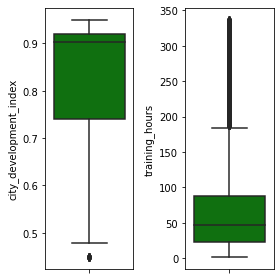

In [197]:
features = nums
plt.figure(figsize=(4, 4))
for i in range (0, len(features)):
  plt.subplot(1, len(features), i+1)
  sns.boxplot(y = df[features[i]], color = 'green', orient = 'v')
  plt.tight_layout()

### Dist plots

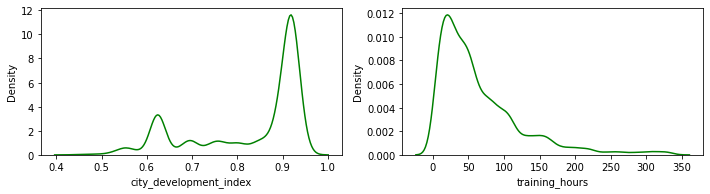

In [198]:
features = nums
plt.figure(figsize=(20, 5))
for i in range(0, len(features)):
  plt.subplot(2 , 4 , i+1)
  sns.kdeplot(x = df[features[i]], color = 'green')
  plt.xlabel(features[i])
  plt.tight_layout()

### Violin plots

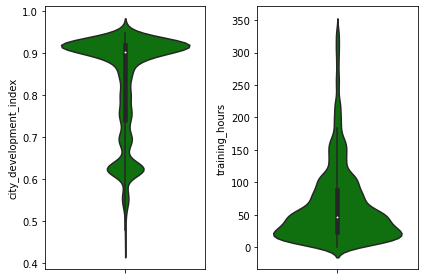

In [199]:
features = nums
for i in range(0, len(features)):
  plt.subplot(1, len(features), i+1)
  sns.violinplot(y = df[features[i]], color = 'green')
  plt.tight_layout()

### Count plot (categorical)

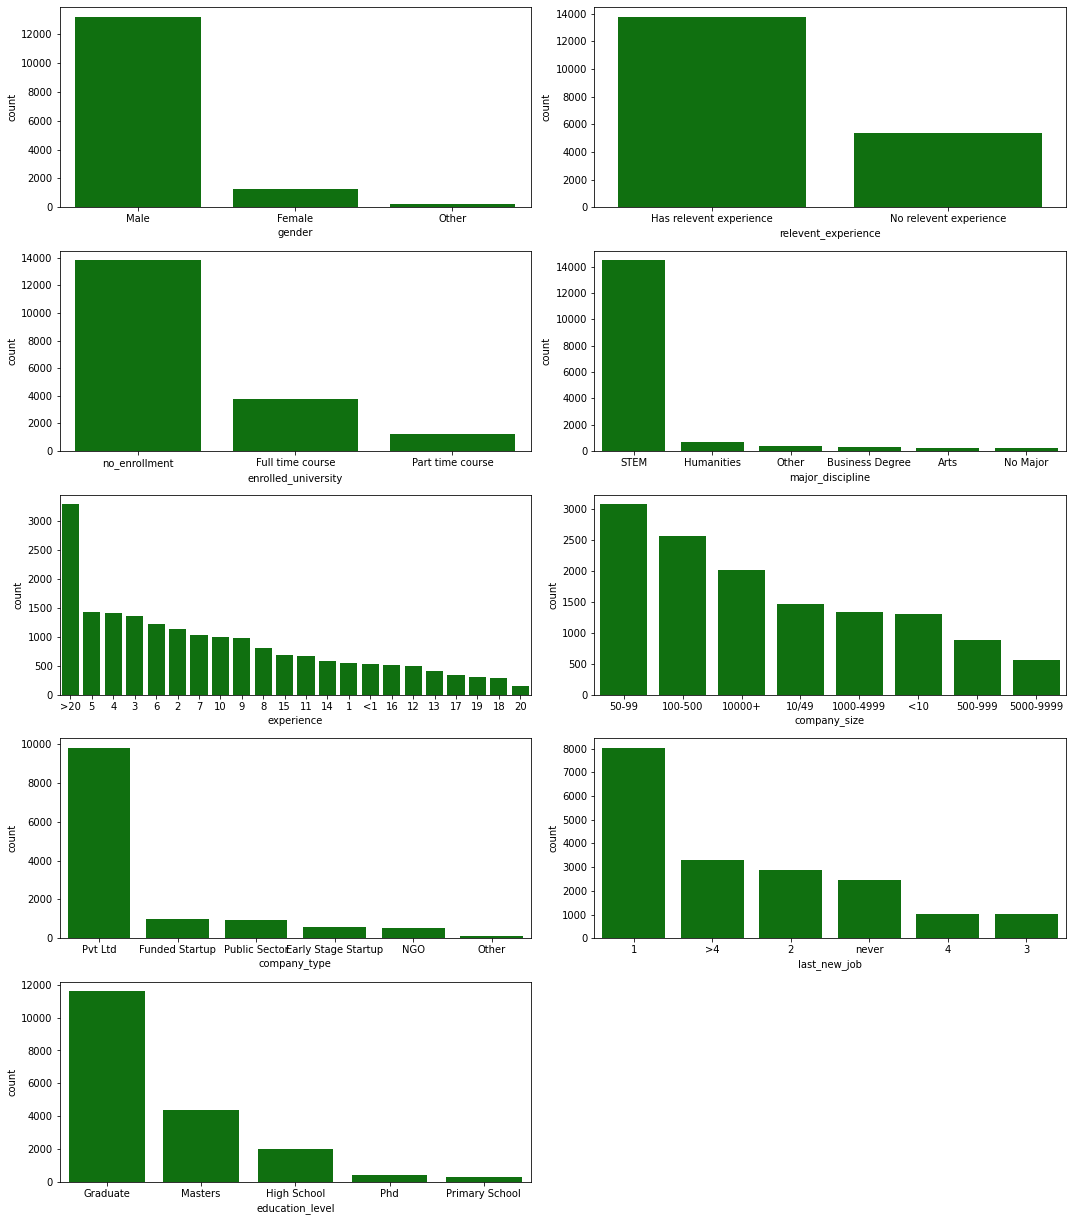

In [200]:
cats2=['gender', 'relevent_experience', 'enrolled_university', 'major_discipline','experience', 'company_size', 'company_type', 'last_new_job', 'education_level']
#cats2 tidak memuat kolom city, education_level
features = cats2
plt.figure(figsize=(15, 20))
for i in range(0, len(features)):
  plt.subplot(6, 2, i+1)
  sns.countplot(x = df[features[i]], order=df[cats2[i]].value_counts().index, color = 'green')
  plt.tight_layout()


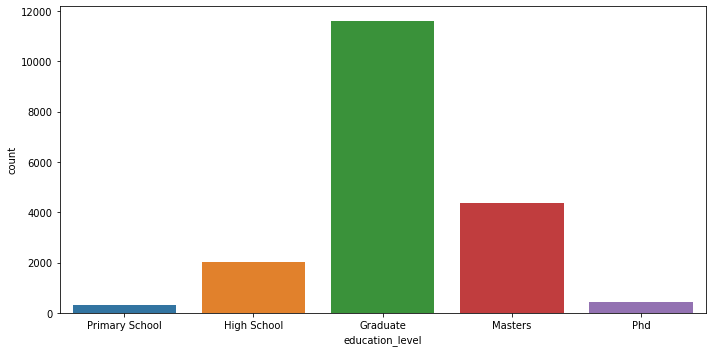

In [201]:
#education_level
plt.figure(figsize=(10, 5))
sns.countplot(x="education_level", order=["Primary School","High School","Graduate","Masters", 'Phd'], data=df)
plt.tight_layout()

### Observasi Univariate Analysis

Gunakan visualisasi untuk melihat distribusi masing-masing kolom (feature maupun target). Tuliskan hasil observasinya, misalnya jika ada suatu kolom yang distribusinya menarik (misal skewed, bimodal, ada outlier, ada nilai yang mendominasi, kategorinya terlalu banyak, dsb). Jelaskan juga apa yang harus di-follow up saat data pre-processing.
 

Observasi :

**A. Data Numerikal**
1. Pada kolom city_development_index, grafik  memiliki dua puncak. Puncak tertinggi berada pada 0,90-0,93, cenderung tidak berdistribusi normal, negative skewed.
2. Pada kolom training_hours, grafik cenderung tidak berdistribusi normal, grafik cenderung condong ke kiri, positive skewed.
3. Untuk kolom city_development_index dan training hours, masih terlihat banyak outlier. Outlier terlihat pada tanda titik diluar interquartile. Pada training hours, outlier terlihat sangat banyak.

**B. Data Kategorikal**
1. Data didominasi oleh Male (>50%), memiliki pengalaman yang relevan (relevent_experience), no_enrollment (enrolled_university), STEM (major_discipline), >20 years (experience), 50-99 (company_size), Pvt Ltd (company_type), dan 1 (last_new_job)
2. Graduate mendominasi data enrolled_level. 


## Multivariate Analysis

### Bivariate Analysis

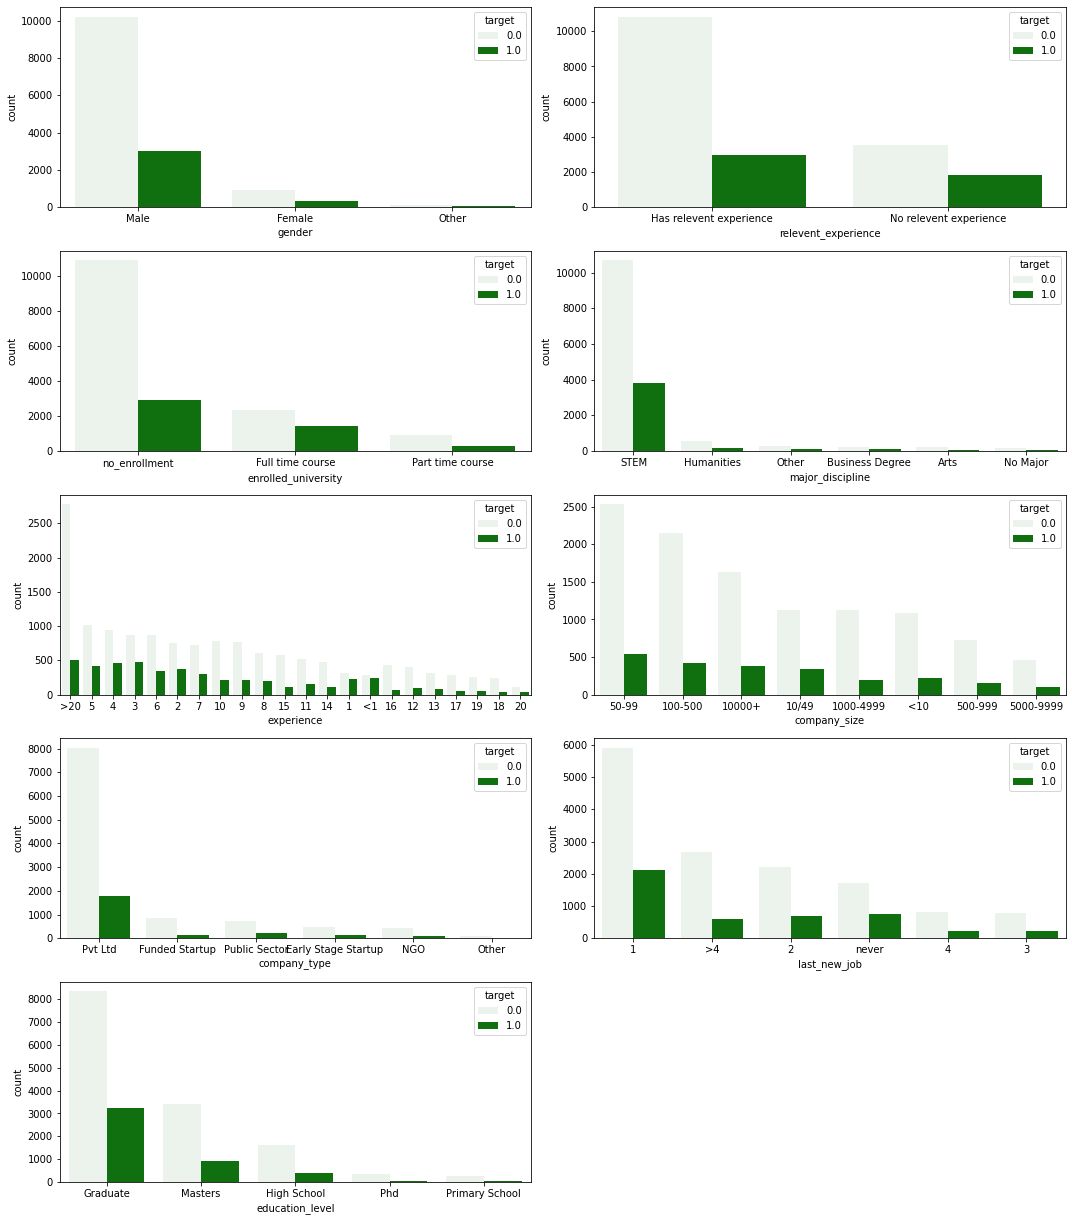

In [202]:
plt.figure(figsize=(15, 20))
for i in range(0, len(cats2)):
    plt.subplot(6, 2, i+1)
    sns.countplot(x = df[cats2[i]], order=df[cats2[i]].value_counts().index, hue='target', data=df, color='green', orient='v')
    plt.tight_layout()


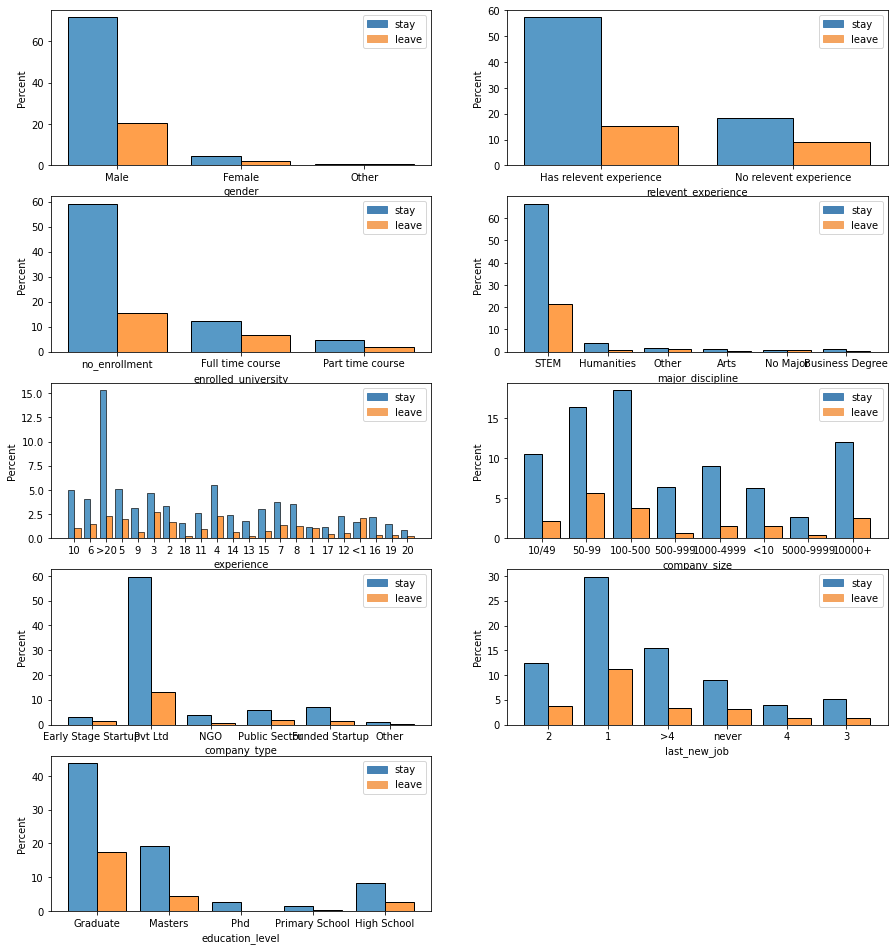

In [203]:
import matplotlib.patches as mpatches
df_sample = df.sample(1000, random_state=42)
plt.figure(figsize=(15, 20))
for i in range(0, len(cats2)):
    plt.subplot (6, 2, i+1)
    ax = sns.histplot(x = df_sample[cats2[i]], multiple = 'dodge', hue=df['target'], stat = 'percent', shrink = 0.8)
    top_bar = mpatches.Patch(color='steelblue', label='stay')
    bottom_bar = mpatches.Patch(color='sandybrown', label='leave')
    plt.legend(handles=[top_bar, bottom_bar])
    total = float(len(df_sample))
    # for p in ax.patches:
    #              percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    #              x = p.get_x() + p.get_width()
    #              y = p.get_height()
    #              ax.annotate(percentage, (x, y), ha = 'center')
# plt.show()

In [204]:
# cats3=['education_level']
# import matplotlib.patches as mpatches
# df_sample = df.sample(1000, random_state=42)
# plt.figure(figsize=(10, 40))
# for i in range(0, len(cats3)):
#     plt.subplot (10, 1, i+1)
#     ax = sns.histplot(x = df_sample[cats3[i]], multiple = 'dodge',order=["Primary School","High School","Graduate","Masters", 'Phd'], hue=df['target'], stat = 'percent', shrink = 0.8)
#     top_bar = mpatches.Patch(color='steelblue', label='stay')
#     bottom_bar = mpatches.Patch(color='sandybrown', label='leave')
#     plt.legend(handles=[top_bar, bottom_bar])
#     total = float(len(df_sample))

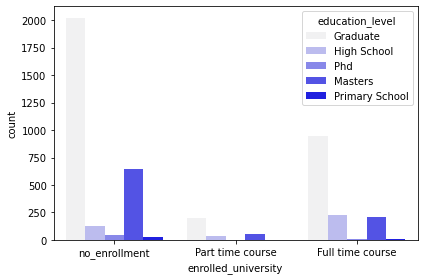

In [205]:
df1= df[df['target']==1]
df1
sns.countplot(x = 'enrolled_university', hue = 'education_level',data=df1, color='blue', orient='v')
plt.tight_layout()

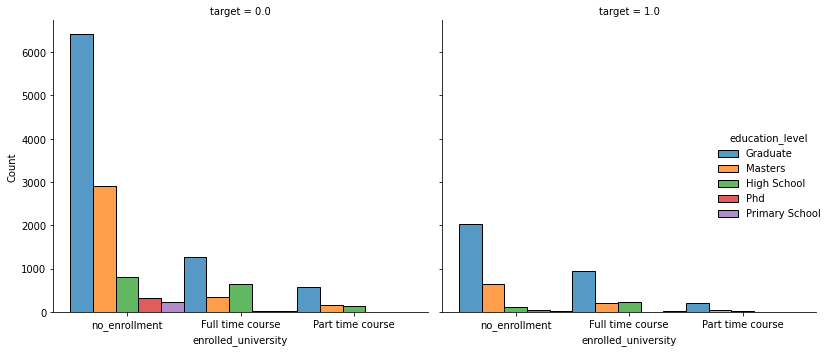

In [206]:
sns.displot(df, x='enrolled_university',hue='education_level', col='target', multiple="dodge");
plt.tight_layout()

### Correlation heatmap

In [207]:
df.corr()

,enrollee_id,city_development_index,training_hours,target
enrollee_id,1.000000,-0.040455,0.000998,0.049475
city_development_index,-0.040455,1.000000,0.001920,-0.341665
training_hours,0.000998,0.001920,1.000000,-0.021577
target,0.049475,-0.341665,-0.021577,1.000000


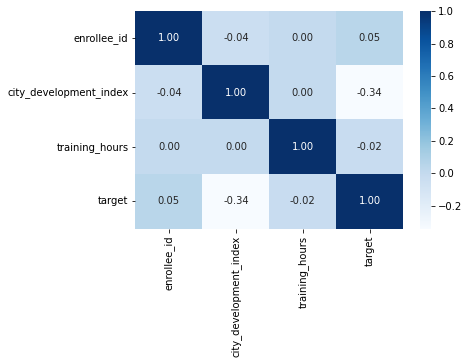

In [208]:
sns.heatmap(df.corr(), cmap = 'Blues', annot = True, fmt = '.2f');

### Pair plot

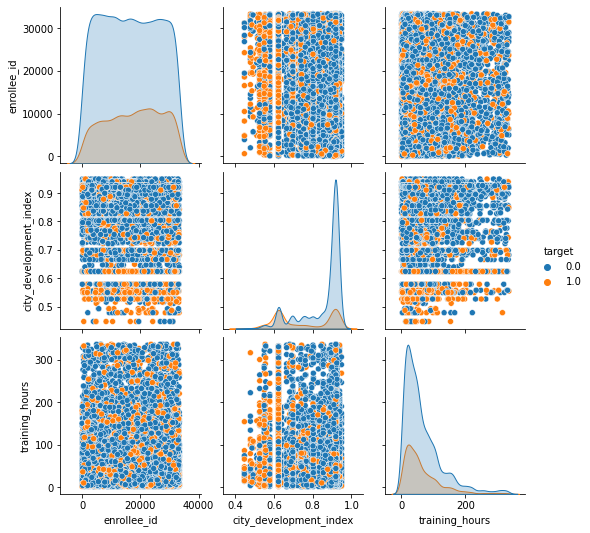

In [209]:
sns.pairplot(df, diag_kind = 'kde', hue = 'target')

###Observasi Multivariate Analysis

Lakukan multivariate analysis (seperti correlation heatmap dan category plots, sesuai yang diajarkan di kelas). Tuliskan hasil observasinya, seperti:
A. Bagaimana korelasi antara masing-masing feature dan label. Kira-kira feature mana saja yang paling relevan dan harus dipertahankan?
B. Bagaimana korelasi antar-feature, apakah ada pola yang menarik? Apa yang perlu dilakukan terhadap feature itu?
Tuliskan juga jika memang tidak ada feature yang saling berkorelasi

1. Sebagian besar pekerja yang mengikuti pelatihan adalah pria.
2. Peserta training dengan lama pengalaman bekerja <1 tahun lebih banyak yang mencari pekerjaan lain.
3. Persentase pekerja yang mencari pekerjaan lain lebih besar porsinya pada kelompok yang tidak memiliki pengalaman kerja relevan dibanding yang memiliki pengalaman kerja relevan
4. Sebagian besar peserta memiliki background dari bidang sains, teknologi, teknik, dan matematika
5. Golongan Graduate dengan kriteria no_enrollment, jumlahnya lebih banyak yang memiliki target 0 (tidak mencari pekerjaan lain).
6. Dari heatmap di atas terlihat adanya nilai -0.34 antara target dan city_development_index yang mengindikasi semakin menurunnya angka city_development_index maka calon pegawai cenderung mencari pekerjaan lain dan sebaliknya (weak negative correlation).
7. Dari pairplot diatas mendukung hipotesis bahwa semakin menurunnya angka city development index maka target cenderung ke angka 1 namun pada training hours tidak menunjukan adanya suatu hubungan



##Insight and Conclusion
-----
Selain EDA, lakukan juga beberapa analisis dan visualisasi untuk menemukan suatu business insight. Tuliskan minimal 3 insight, dan berdasarkan insight tersebut jelaskan rekomendasinya untuk bisnis.

###Insight for Business

Beberapa hal yang kita temukan dari EDA dataset ini adalah:
1. Karyawan yang memiliki latar belakang : Graduate, dan no_enrollment memiliki kecenderungan untuk tidak mencari pekerjaan lain (target 0), jumlah target 0 lebih besar dengan target 1. Hal ini perlu menjadi perhatian perusahaan, karena dapat lebih menghemat biaya training dan mengurangi biaya lost akibat karyawan yang mencari pekerjaan lain. Perusahaan juga tidak kesulitan dalam memilih kandidat karena jumlahnya yang cukup banyak. 
2. Karyawan yang berasal dari kota dengan index pembangunan yang lebih rendah cenderung mencari pekerjaan lain (target 1). Baiknya menjadi salah satu concern bagi perusahaan dalam melakukan training dan perekrutan.
3. Karyawan dengan pengalaman kerja yang relevan lebih cenderung untuk tidak mencari pekerjaan lain (target 0). Faktor ini dapat menjadi salah satu penentu untuk perusahaan dalam memberikan pelatihan kepada karyawan yang ingin menambah kemampuannya dalam bidang data science sehingga perusahaan bisa mendapatkan karyawan dengan kualitas yang lebih baik (memiliki pengalaman kerja yang relevan dan sudah meningkatkan kemampuan melalui pelatihan yang telah diikuti).

### Insight for EDA

1. Kolom variabel training_hours, nilai mean > nilai medium, grafik cenderung positive skewed. Dapat dilakukan untuk pre-processing selanjutnya dengan log transformation.
2. Pada kolom city_development_index, grafik memiliki dua puncak. Puncak tertinggi berada pada 0,90-0,93, cenderung tidak berdistribusi normal, negative skewed. Pertimbangan dilakukan analisis lebih dalam.
3. Outlier terlihat pada tanda titik di luar interquartile pada kolom city_development_index dan training hours, Pada training hours, outlier terlihat sangat banyak. Pertimbangkan untuk diproses lebih lanjut.
4. Kolom city memiliki kardinalitas (jumlah unique values) yang tinggi (123). Pertimbangan untuk di drop bila tidak ditemukan adanya insight lain.
5. Beberapa null-value pada beberapa kolom: gender, enrolled_university, education_level, major_discipline, experience, company_size, company_type, dan last_new_job. Pertimbangkan untuk didrop (Bila tidak memiliki insight lain), atau perlakuan lanjutan untuk data cleansing.


#Stage 2 - Data Preprocessing

Lakukan pembersihan data, sesuai yang diajarkan di kelas, seperti:
1. Handle missing values
2. Handle duplicated data
3. Handle outliers
4. Feature transformation
5. Feature encoding
6. Handle class imbalance

##Handling Missing Value

In [210]:
df.isna().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

###1. Gender

In [211]:
# handling missing values for gender with 4500 nulls
df.gender.value_counts()
df.gender.isna().sum()

4508

In [212]:
# because lots of nulls we found, we cannot impute them all with mode. what we can do is to clarify null values as new category which not part of 'Female', 'Male', nor 'Others' then impute null values in gender with new category named 'Unspecified'
df['gender'].loc[df['gender'].isnull()==True]='Other'
df.gender.value_counts()
df.gender.isna().sum()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


0

###2. enrolled_university

In [213]:
# handling missing values for enrolled_university with 386 nulls
df.enrolled_university .value_counts()
df.enrolled_university .isna().sum()

386

In [214]:
df['enrolled_university'].fillna(df['enrolled_university'].mode()[0], inplace=True)  # impute null values with mode
df.enrolled_university .value_counts()
df.enrolled_university .isna().sum()

0

###3. education_level

In [215]:
# education_level with 460 nulls
df.education_level.value_counts()
df.education_level.isna().sum()

460

In [216]:
 # impute null values with mode
df['education_level'].fillna(df['education_level'].mode()[0], inplace=True)
df.education_level.value_counts()
df.education_level.isna().sum()

0

###4. major_discipline

In [217]:
# education_level with 2813 nulls
df.major_discipline.value_counts()
df.major_discipline.isna().sum()

2813

In [218]:
df['major_discipline'].fillna(df['major_discipline'].mode()[0], inplace=True)  #impute null values with mode
df.major_discipline.value_counts()
df.major_discipline.isna().sum()

0

###5. experience

In [219]:
#terdapat 65 null values
df.experience.value_counts()
df.experience.isna().sum()

65

In [220]:
#mengganti null values dengan mode
df['experience'].fillna(df['experience'].mode()[0], inplace=True)
df.experience.value_counts()
df.experience.isna().sum()

0

In [221]:
df.experience.replace('>20','22',inplace=True) # normalisasi value bernilai spesial karakter dengan full numerik, >20 diganti dengan 22
df.experience.replace('<1','0',inplace=True)  ## normalisasi value bernilai spesial karakter dengan full numerik, <1 diganti dengan 0
df.experience=pd.to_numeric(df.experience)  
df['experience']=np.where(df['experience']>10,'Senior-level', np.where(df['experience']>5, 'Mid-level', np.where(df['experience']>3,'Intermediate-level' ,'Entry-level')))
#membuat level2 experience pekerjaan dari value yang sudah dibuat menjadi full numerik 


In [222]:
# mengecek value baru yang dibuat berdasarkan kategori pengalaman kerjanya
df['experience'].value_counts()

Senior-level          7762
Mid-level             5011
Entry-level           3552
Intermediate-level    2833
Name: experience, dtype: int64

###6. company_size

In [223]:
#terdapat 5938 null values
df.company_size.value_counts()
df.company_size.isna().sum()

5938

In [224]:
#berdasarkan kategori besar perusahaan

df.company_size.replace('<10','9',inplace=True) # mengganti spesial karakter menjadi full numerik
df.company_size.replace('10/49','20',inplace=True)
df.company_size.replace('50-99','55',inplace=True)
df.company_size.replace('100-500','300',inplace=True)
df.company_size.replace('10000+','10001',inplace=True)
df.company_size.replace('500-999','600',inplace=True)
df.company_size.replace('5000-9999','6000',inplace=True)
df.company_size.replace('1000-4999','3000',inplace=True)
df.company_size= pd.to_numeric(df.company_size)
df['company_size']=np.where(df['company_size']>2000,'Large-co.', np.where(df['company_size']> 1000,'Medium-co.',np.where(df['company_size']>1,'Small-co.','Unspecified')))
# kategorikan level perusahaan berdasarkan banyaknya pegawai, jadikan null value sebagai kategori baru yaitu unspecified
df['company_size'].value_counts()

Small-co.      9310
Unspecified    5938
Large-co.      3910
Name: company_size, dtype: int64

In [225]:
df.company_size.value_counts()
df.company_size.isna().sum()

0

###7. company_type

In [226]:
#terdapat 6140 null values, sangat banyak, maka kita kategorikan menjadi Other
df.company_type.value_counts()
df.company_type.isna().sum()

6140

In [227]:
df['company_type'].value_counts()

Pvt Ltd                9817
Funded Startup         1001
Public Sector           955
Early Stage Startup     603
NGO                     521
Other                   121
Name: company_type, dtype: int64

In [228]:
df['company_type'].loc[df['company_type'].isnull()==True]='Other'
df.company_type.value_counts()
df.company_type.isna().sum()

0

In [229]:
df['company_type'].value_counts()

Pvt Ltd                9817
Other                  6261
Funded Startup         1001
Public Sector           955
Early Stage Startup     603
NGO                     521
Name: company_type, dtype: int64

###8. last_new_job

In [230]:
#terdapat 423 null values
df.last_new_job.value_counts()
df.last_new_job.isna().sum()

423

In [231]:
df['last_new_job'].fillna(df['last_new_job'].mode()[0], inplace=True)  #ganti null values dengan mode
df.last_new_job.value_counts()
df.last_new_job.isna().sum()

0

In [232]:
df.last_new_job.value_counts()  #value tidak normal, harusnya bisa dijadikan numerik dan bisa jadi variabel untuk menghitung korelasi dengan target kolom

1        8463
>4       3290
2        2900
never    2452
4        1029
3        1024
Name: last_new_job, dtype: int64

In [233]:
df.last_new_job.value_counts()      
df.last_new_job.replace('>4','5',inplace=True)   #normalisasi value yang berupa spesial karakter menjadi full numerik
df.last_new_job.replace('never','0',inplace=True)
df['last_new_job'].fillna(df['last_new_job'].mode()[0], inplace=True) #Replace with majority category of 1 year diff
df.last_new_job=df.last_new_job.astype(int) #ganti data type menjadi integer

In [234]:
df.last_new_job.value_counts()

1    8463
5    3290
2    2900
0    2452
4    1029
3    1024
Name: last_new_job, dtype: int64

###Checking and Recap

In [235]:
df.isna().sum()  #cek apakah masih ada missing value?

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

In [236]:
cat_cols = []   #membuat list categorical colums
for i in df.columns:  #untuk setiap i sebagai kolom yang ada di df
    if df[i].dtypes == 'object':  #jika kolom di df bertipe object maka dianggap sebagai categorical columns
        cat_cols.append(i)  #maka menambahkan categorical columns dengan kondisi bertipe object pada list cat_cols

In [237]:
cat_cols #return categorical columns yang sudah dikondisikan

['city',
 'gender',
 'relevent_experience',
 'enrolled_university',
 'education_level',
 'major_discipline',
 'experience',
 'company_size',
 'company_type']

In [238]:
num_cols = []   #membuat list numerical colums
for i in df.columns:       #untuk setiap i sebagai kolom yang ada di df
    if i not in cat_cols:    #jika kolom di df bukan merupakan bagian dari list cat_cols
        num_cols.append(i)    #maka menambahkan column tersebut pada numerical columns

In [239]:
for col in cat_cols:  #untuk setiap column pada cat_cols list
    print(f'''Values   count  {col} column:''')  #return print of text
    print(df[col].value_counts())   #menghitung banyaknya nilai pada setiap columns dataset
    print() 

Values   count  city column:
city_103    4355
city_21     2702
city_16     1533
city_114    1336
city_160     845
            ... 
city_129       3
city_111       3
city_121       3
city_140       1
city_171       1
Name: city, Length: 123, dtype: int64

Values   count  gender column:
Male      13221
Other      4699
Female     1238
Name: gender, dtype: int64

Values   count  relevent_experience column:
Has relevent experience    13792
No relevent experience      5366
Name: relevent_experience, dtype: int64

Values   count  enrolled_university column:
no_enrollment       14203
Full time course     3757
Part time course     1198
Name: enrolled_university, dtype: int64

Values   count  education_level column:
Graduate          12058
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: education_level, dtype: int64

Values   count  major_discipline column:
STEM               17305
Humanities           669
Other                381
Business De

In [240]:
df.describe()  

,enrollee_id,city_development_index,last_new_job,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,1.978338,65.366896,0.249348
std,9616.292592,0.123362,1.663502,60.058462,0.432647
min,1.000000,0.448000,0.000000,1.000000,0.000000
25%,8554.250000,0.740000,1.000000,23.000000,0.000000
50%,16982.500000,0.903000,1.000000,47.000000,0.000000
75%,25169.750000,0.920000,3.000000,88.000000,0.000000
max,33380.000000,0.949000,5.000000,336.000000,1.000000


Sejauh ini tidak ada yang negatif, sehingga tidak perlu di drop untuk numerical columns

In [241]:
cat_cols = []   #membuat list categorical colums
for i in df.columns:  #untuk setiap i sebagai kolom yang ada di df
    if df[i].dtypes == 'object':  #jika kolom di df bertipe object maka dianggap sebagai categorical columns
        cat_cols.append(i)  #maka menambahkan categorical columns dengan kondisi bertipe object pada list cat_cols

In [242]:
cat_cols

['city',
 'gender',
 'relevent_experience',
 'enrolled_university',
 'education_level',
 'major_discipline',
 'experience',
 'company_size',
 'company_type']

In [243]:
df[cat_cols].describe()

,city,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type
count,19158,19158,19158,19158,19158,19158,19158,19158,19158
unique,123,3,2,3,5,6,4,3,6
top,city_103,Male,Has relevent experience,no_enrollment,Graduate,STEM,Senior-level,Small-co.,Pvt Ltd
freq,4355,13221,13792,14203,12058,17305,7762,9310,9817


1. enrollee_id                  0 
2. city                         0 --> akhirnya didrop
3. city_development_index       0
4. **gender   =                 4508** (Null-value diberi kategori 'Unspecified')
5. relevent_experience          0
6. **enrolled_university =        386** (Null-value diisi Modus)
7. **education_level =           460** (Null-value diisi Modus)
8. **major_discipline =         2813** (Null-value diisi Modus)
9. **experience =                 65** (Null-value diisi Modus, diconvert ke numerik, dan dinormalisasi ke 4 kategori : Senior-level,Mid-level, Entry-level, dan Intermediate-level)

10. **company_size =            5938** (Null-value diberi kategori 'Unspecified', Data lain diconvert ke numerik, data dinormalisasi ke 3 kategori : Small-co, Unspecified, dan Large-co. ) 

11. **company_type =            6140** (Null-value diberi kategori 'Unspecified') 

12. **last_new_job =             423** (Null-value diisi Modus, Data lain diconvert ke numerik, data dinormalisasi ke 6 kategori : 0, 1, 2, 3, 4, dan 5 ) 

13. training_hours              0
14. target                      0

## Handling Duplicated Data

In [244]:
# cek jumlah duplicated rows
# dari semua kolom
df.duplicated().sum()

0

tidak ada duplicate data pada dataset sehingga tidak perlu dilakukan 

## Handle Outliers

In [245]:
num_cols = ['city_development_index','training_hours']

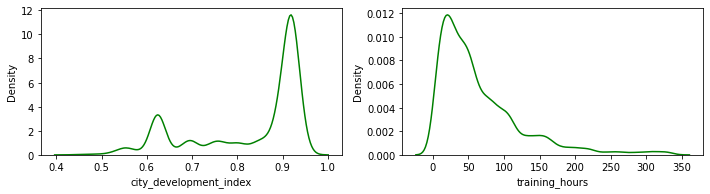

In [246]:
#distribusi variabel pada kolom-kolom num_cols
features = num_cols
plt.figure(figsize=(20, 5))
for i in range(0, len(features)):
  plt.subplot(2 , 4 , i+1)
  sns.kdeplot(x = df[features[i]], color = 'green')
  plt.xlabel(features[i])
  plt.tight_layout()

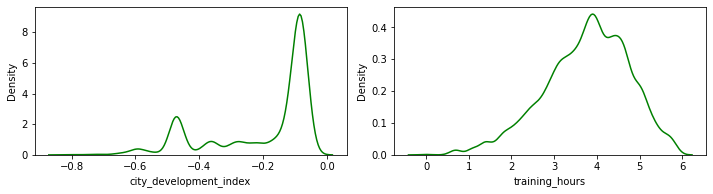

In [247]:
#distribusi variabel pada kolom-kolom num_cols
features = num_cols
plt.figure(figsize=(20, 5))
for i in range(0, len(features)):
  plt.subplot(2 , 4 , i+1)
  sns.kdeplot(x = np.log(df[features[i]]), color = 'green')
  plt.xlabel(features[i])
  plt.tight_layout()

In [248]:
df['log_training_hours'] = np.log(df['training_hours'])

In [249]:
df = df.drop(columns='training_hours')

In [250]:
#nums_updated
nums_updated = []   #membuat list numerical colums
for i in df.columns:       #untuk setiap i sebagai kolom yang ada di df
    if i not in cat_cols:    #jika kolom di df bukan merupakan bagian dari list cat_cols
        nums_updated.append(i)    #maka menambahkan column tersebut pada numerical columns

In [251]:
nums_updated

['enrollee_id',
 'city_development_index',
 'last_new_job',
 'target',
 'log_training_hours']

In [252]:
from scipy import stats

print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')

filtered_entries = np.array([True] * len(df))

for col in nums_updated:
    zscore = abs(stats.zscore(df[col])) # hitung absolute z-scorenya
    filtered_entries = (zscore < 3) & filtered_entries # keep yang kurang dari 3 absolute z-scorenya
    
df = df[filtered_entries] # filter, cuma ambil yang z-scorenya dibawah 3

print(f'Jumlah baris setelah memfilter outlier: {len(df)}')

Jumlah baris sebelum memfilter outlier: 19158
Jumlah baris setelah memfilter outlier: 19036


### Recap
Handling outlier dilakukan untuk data numerik
Data numerik kita : 
1. enrollee_id (tidak bermakna) 
2. **city_development_index** ---> **dilanjutkan handling outlier**
3. last_new_job (data lebih kategorik)
4. **training_hours** ----> **dilanjutkan handling outlier**
5. target (data lebih kategorik)

kolom training_hours (positive skewed), dilanjutkan log transformation dan membuang outlier dengan Z score > 3

## Features Transforming

In [253]:
df.describe()

,enrollee_id,city_development_index,last_new_job,target,log_training_hours
count,19036.000000,19036.000000,19036.000000,19036.000000,19036.000000
mean,16874.206451,0.829264,1.980458,0.248949,3.779402
std,9618.833729,0.122889,1.663886,0.432416,0.962015
min,1.000000,0.479000,0.000000,0.000000,1.098612
25%,8547.750000,0.740000,1.000000,0.000000,3.135494
50%,16978.500000,0.903000,1.000000,0.000000,3.871201
75%,25170.500000,0.920000,3.000000,0.000000,4.488636
max,33380.000000,0.949000,5.000000,1.000000,5.817111


In [254]:
df = df.drop(columns = 'enrollee_id') #buang enrollee_id karena data jdi tidak normal dan unique value terlalu banyak
df.describe()

,city_development_index,last_new_job,target,log_training_hours
count,19036.000000,19036.000000,19036.000000,19036.000000
mean,0.829264,1.980458,0.248949,3.779402
std,0.122889,1.663886,0.432416,0.962015
min,0.479000,0.000000,0.000000,1.098612
25%,0.740000,1.000000,0.000000,3.135494
50%,0.903000,1.000000,0.000000,3.871201
75%,0.920000,3.000000,0.000000,4.488636
max,0.949000,5.000000,1.000000,5.817111


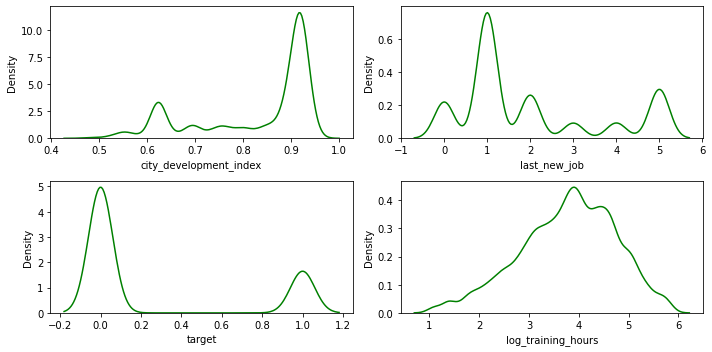

In [255]:
#nums_updated
nums_updated = []   #membuat list numerical colums
for i in df.columns:       #untuk setiap i sebagai kolom yang ada di df
    if i not in cat_cols:    #jika kolom di df bukan merupakan bagian dari list cat_cols
        nums_updated.append(i) 
features = nums_updated
plt.figure(figsize=(10, 5))
for i in range (0, len(features)):
  plt.subplot(2, 2, i+1)
  sns.kdeplot(x = df[features[i]], color = 'green')
  plt.xlabel(features[i])
  plt.tight_layout()


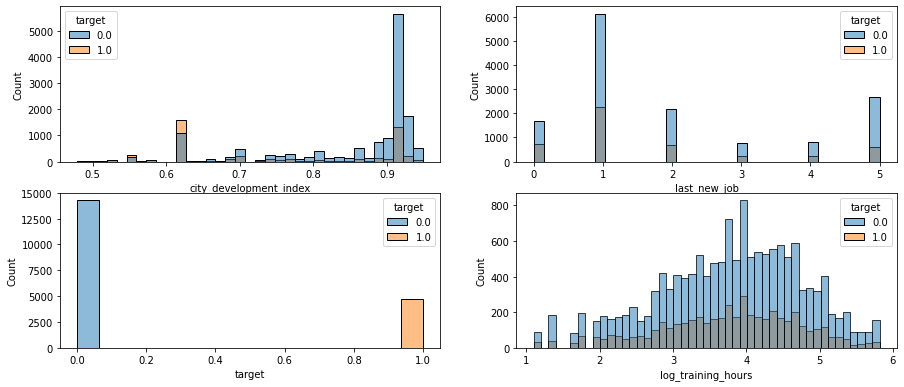

In [256]:
plt.figure(figsize=(15, 20))
for i in range(0, len(nums_updated)):
    plt.subplot(6, 2, i+1)
    sns.histplot(x = df[nums_updated[i]], hue='target', data=df, color='green')

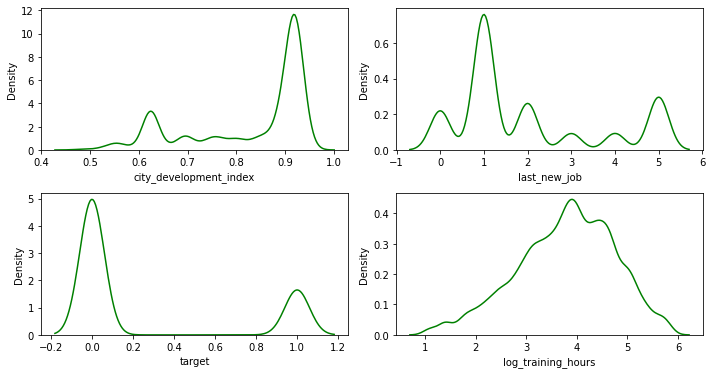

In [257]:
#Grafik sebelum dan sesudah ditransformasi
#nums_updated
nums_updated = []   #membuat list numerical colums
for i in df.columns:       #untuk setiap i sebagai kolom yang ada di df
    if i not in cat_cols:    #jika kolom di df bukan merupakan bagian dari list cat_cols
        nums_updated.append(i) 
     
features = nums_updated
plt.figure(figsize=(10, 10))
for i in range (0, len(features)):
  plt.subplot(4, 2, i+1)
  sns.kdeplot(x = df[features[i]], color = 'green')
  plt.xlabel(features[i])
  plt.tight_layout()

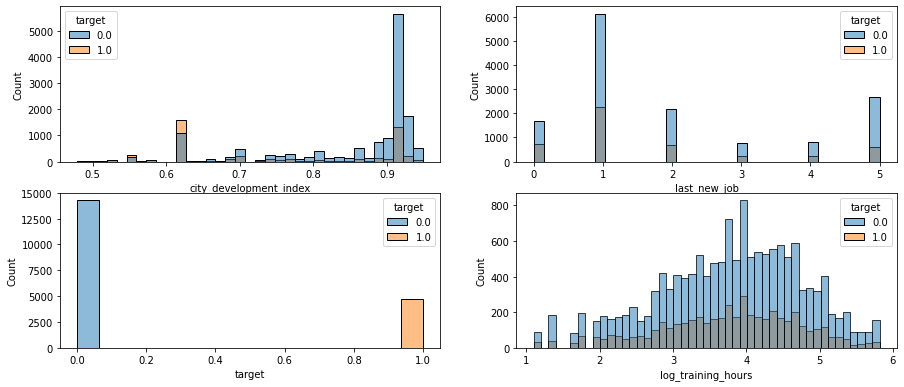

In [258]:
plt.figure(figsize=(15, 20))
for i in range(0, len(nums_updated)):
    plt.subplot(6, 2, i+1)
    sns.histplot(x = df[nums_updated[i]], hue='target', data=df, color='green')


## Features Encoding

Encoding Categorical Data
There are three common approaches for converting ordinal and categorical variables to numerical values. They are:

1.   Ordinal Encoding
2.   One-Hot Encoding
3.   Dummy Variable Encoding

 **1. Ordinal Encoding**


In ordinal encoding, each unique category value is assigned an integer value.

For example, “red” is 1, “green” is 2, and “blue” is 3.

This is called an ordinal encoding or an integer encoding and is easily reversible. Often, integer values starting at zero are used.

In [259]:
cats_updated = []   #membuat list categorical colums
for i in df.columns:  #untuk setiap i sebagai kolom yang ada di df
    if df[i].dtypes == 'object':  #jika kolom di df bertipe object maka dianggap sebagai categorical columns
        cats_updated.append(i)  
cats_updated

['city',
 'gender',
 'relevent_experience',
 'enrolled_university',
 'education_level',
 'major_discipline',
 'experience',
 'company_size',
 'company_type']

In [260]:
#menghitung value pada setiap kolom
for col in cats_updated:
  print(f'value counts of column {col}')
  print(df[col].value_counts())
  print('---'*10, '\n')

value counts of column city
city_103    4335
city_21     2686
city_16     1525
city_114    1324
city_160     844
            ... 
city_111       3
city_121       3
city_129       3
city_140       1
city_171       1
Name: city, Length: 122, dtype: int64
------------------------------ 

value counts of column gender
Male      13147
Other      4655
Female     1234
Name: gender, dtype: int64
------------------------------ 

value counts of column relevent_experience
Has relevent experience    13708
No relevent experience      5328
Name: relevent_experience, dtype: int64
------------------------------ 

value counts of column enrolled_university
no_enrollment       14121
Full time course     3725
Part time course     1190
Name: enrolled_university, dtype: int64
------------------------------ 

value counts of column education_level
Graduate          11980
Masters            4334
High School        2002
Phd                 414
Primary School      306
Name: education_level, dtype: int64
-----

In [261]:
#simpan dataframe baru yang akan di encoding
df_encode=df.copy() 

In [262]:
#spesifikasi relevent_experience
relevent_experience_map = {"Has relevent experience":1,"No relevent experience":0}
df_encode['relevent_experience']= df_encode['relevent_experience'].map(relevent_experience_map)

In [263]:
company_size_map = {
                    'Unspecified':0, 
                    'Small-co.':1,
                    'Medium-co.':2,
                    'Large-co.':3
                    }
df_encode['company_size']= df_encode['company_size'].map(company_size_map)

experience_map =  {
                  'Entry-level':0,
                  'Intermediate-level':1, 
                  'Mid-level':2,
                'Senior-level' :3
                  }
df_encode['experience']= df_encode['experience'].map(experience_map)
education_level_map = {
                  'Primary School':0,
                  'High School':1,
                  'Graduate':2,
                  'Masters':3,
                  'Phd' :4
                  }
df_encode['education_level']= df_encode['education_level'].map(education_level_map)

In [264]:
#rename relevent_experience jadi relevent_experience_map
df_encode= df_encode.rename(columns={
                                      'relevent_experience': 'relevent_experience_map',
                                     'company_size': 'company_size_map',
                                     'experience': 'experience_map',
                                     'education_level':'education_level_map'})

**2. One Hot Encoding**

In [265]:
#encode kategorikal data yang antar valuenya tidak berkaitan
one_hot_cats=df_encode[['gender','major_discipline', 'company_type','enrolled_university']]
one_hot=pd.get_dummies(one_hot_cats)


In [266]:
df_encode = df_encode.join(one_hot) #join one_hot ke df_encode

In [267]:
one_hot.tail()
one_hot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19036 entries, 0 to 19157
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype
---  ------                                --------------  -----
 0   gender_Female                         19036 non-null  uint8
 1   gender_Male                           19036 non-null  uint8
 2   gender_Other                          19036 non-null  uint8
 3   major_discipline_Arts                 19036 non-null  uint8
 4   major_discipline_Business Degree      19036 non-null  uint8
 5   major_discipline_Humanities           19036 non-null  uint8
 6   major_discipline_No Major             19036 non-null  uint8
 7   major_discipline_Other                19036 non-null  uint8
 8   major_discipline_STEM                 19036 non-null  uint8
 9   company_type_Early Stage Startup      19036 non-null  uint8
 10  company_type_Funded Startup           19036 non-null  uint8
 11  company_type_NGO                      190

In [268]:
df_encode.tail()

,city,city_development_index,gender,relevent_experience_map,enrolled_university,education_level_map,major_discipline,experience_map,company_size_map,company_type,...,major_discipline_STEM,company_type_Early Stage Startup,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,enrolled_university_Full time course,enrolled_university_Part time course,enrolled_university_no_enrollment
19153,city_173,0.878,Male,0,no_enrollment,2,Humanities,3,0,Other,...,0,0,0,0,1,0,0,0,0,1
19154,city_103,0.920,Male,1,no_enrollment,2,STEM,3,0,Other,...,1,0,0,0,1,0,0,0,0,1
19155,city_103,0.920,Male,1,no_enrollment,2,STEM,3,1,Pvt Ltd,...,1,0,0,0,0,0,1,0,0,1
19156,city_65,0.802,Male,1,no_enrollment,1,STEM,0,1,Pvt Ltd,...,1,0,0,0,0,0,1,0,0,1
19157,city_67,0.855,Other,0,no_enrollment,0,STEM,0,0,Other,...,1,0,0,0,1,0,0,0,0,1


**Drop kolom-kolom yang outdated**

In [269]:
#return list dari kategorikal kolom bertipe bukan integer dan float dalam dataframe
cats_col=[name for name in df_encode.columns if df_encode[name].dtype in ['object']]  
cats_col

['city', 'gender', 'enrolled_university', 'major_discipline', 'company_type']

In [270]:
#drop kolom-kolom bertipe bukan integer dan float karena sudah diencoding
df_now = df_encode.drop(columns = cats_col)

In [271]:
df_now.head()

,city_development_index,relevent_experience_map,education_level_map,experience_map,company_size_map,last_new_job,target,log_training_hours,gender_Female,gender_Male,...,major_discipline_STEM,company_type_Early Stage Startup,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,enrolled_university_Full time course,enrolled_university_Part time course,enrolled_university_no_enrollment
0,0.920,1,2,3,0,1,1.0,3.583519,0,1,...,1,0,0,0,1,0,0,0,0,1
1,0.776,0,2,3,1,5,0.0,3.850148,0,1,...,1,0,0,0,0,0,1,0,0,1
2,0.624,0,2,1,0,0,0.0,4.418841,0,0,...,1,0,0,0,1,0,0,1,0,0
3,0.789,0,2,0,0,0,1.0,3.951244,0,0,...,0,0,0,0,0,0,1,0,0,1
4,0.767,1,3,3,1,4,0.0,2.079442,0,1,...,1,0,1,0,0,0,0,0,0,1


In [272]:
df_now.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19036 entries, 0 to 19157
Data columns (total 26 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   city_development_index                19036 non-null  float64
 1   relevent_experience_map               19036 non-null  int64  
 2   education_level_map                   19036 non-null  int64  
 3   experience_map                        19036 non-null  int64  
 4   company_size_map                      19036 non-null  int64  
 5   last_new_job                          19036 non-null  int64  
 6   target                                19036 non-null  float64
 7   log_training_hours                    19036 non-null  float64
 8   gender_Female                         19036 non-null  uint8  
 9   gender_Male                           19036 non-null  uint8  
 10  gender_Other                          19036 non-null  uint8  
 11  major_disciplin

In [273]:
df_now.tail(20)

,city_development_index,relevent_experience_map,education_level_map,experience_map,company_size_map,last_new_job,target,log_training_hours,gender_Female,gender_Male,...,major_discipline_STEM,company_type_Early Stage Startup,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,enrolled_university_Full time course,enrolled_university_Part time course,enrolled_university_no_enrollment
19138,0.698,1,3,3,1,1,0.0,2.833213,0,0,...,1,0,0,0,0,0,1,0,0,1
19139,0.624,1,2,1,0,1,0.0,2.564949,0,0,...,1,0,0,0,1,0,0,1,0,0
19140,0.920,0,0,0,0,0,0.0,2.708050,0,0,...,1,0,0,0,1,0,0,0,0,1
19141,0.899,1,2,3,1,3,0.0,2.484907,0,1,...,1,0,1,0,0,0,0,0,0,1
19142,0.776,1,2,1,1,1,0.0,3.258097,0,1,...,1,1,0,0,0,0,0,0,0,1
19143,0.920,1,2,3,3,5,0.0,2.890372,0,1,...,1,0,0,0,0,0,1,0,0,1
19144,0.624,0,2,1,0,0,1.0,3.871201,0,0,...,1,0,0,0,1,0,0,1,0,0
19145,0.725,0,2,1,0,0,0.0,5.247024,0,0,...,1,0,0,0,0,0,1,1,0,0
19146,0.920,1,2,1,1,1,0.0,3.931826,0,1,...,1,0,0,0,0,0,1,0,0,1
19147,0.624,0,2,0,1,1,1.0,3.951244,0,1,...,1,0,0,0,0,0,1,1,0,0


In [274]:
df_now.isna().sum()

city_development_index                  0
relevent_experience_map                 0
education_level_map                     0
experience_map                          0
company_size_map                        0
last_new_job                            0
target                                  0
log_training_hours                      0
gender_Female                           0
gender_Male                             0
gender_Other                            0
major_discipline_Arts                   0
major_discipline_Business Degree        0
major_discipline_Humanities             0
major_discipline_No Major               0
major_discipline_Other                  0
major_discipline_STEM                   0
company_type_Early Stage Startup        0
company_type_Funded Startup             0
company_type_NGO                        0
company_type_Other                      0
company_type_Public Sector              0
company_type_Pvt Ltd                    0
enrolled_university_Full time cour

##Fitur Tambahan


Berikut adalah beberapa fitur tambahan:
- Expectation Salary, untuk melihat gambaran ekspektasi karyawan untuk gaji seorang data scientist
- Data scientist skill set, jobdesc, untuk gambaran apakah sekiranya mampu atau tidak
- Mandatory services (yes / no) : untuk melihat keseriusan karyawan dalam berkarir di bidang data scientist setelah menyelesaikan pelatihan yang telah diberikan oleh perusahaan
- Willing to work overtime : untuk melihat apakah karyawan bersedia bekerja mengikuti kebutuhan target perusahaan
- Working space preferences (WFO/WFH/Hybrid) : mengetahui preferensi budaya kerja karyawan/culture kerja karyawan.

## File post preprocessing

In [275]:
df_now

,city_development_index,relevent_experience_map,education_level_map,experience_map,company_size_map,last_new_job,target,log_training_hours,gender_Female,gender_Male,...,major_discipline_STEM,company_type_Early Stage Startup,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,enrolled_university_Full time course,enrolled_university_Part time course,enrolled_university_no_enrollment
0,0.920,1,2,3,0,1,1.0,3.583519,0,1,...,1,0,0,0,1,0,0,0,0,1
1,0.776,0,2,3,1,5,0.0,3.850148,0,1,...,1,0,0,0,0,0,1,0,0,1
2,0.624,0,2,1,0,0,0.0,4.418841,0,0,...,1,0,0,0,1,0,0,1,0,0
3,0.789,0,2,0,0,0,1.0,3.951244,0,0,...,0,0,0,0,0,0,1,0,0,1
4,0.767,1,3,3,1,4,0.0,2.079442,0,1,...,1,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,0.878,0,2,3,0,1,1.0,3.737670,0,1,...,0,0,0,0,1,0,0,0,0,1
19154,0.920,1,2,3,0,4,1.0,3.951244,0,1,...,1,0,0,0,1,0,0,0,0,1
19155,0.920,1,2,3,1,4,0.0,3.784190,0,1,...,1,0,0,0,0,0,1,0,0,1
19156,0.802,1,1,0,1,2,0.0,4.574711,0,1,...,1,0,0,0,0,0,1,0,0,1


# Stage 3 - Modeling, Feature Importance dan Gits


Lakukan modeling sesuai task yang ditentukan di awal dari hasil data yang telah dilakukan
preprocessing dan cleaning pada tahapan sebelumnya:
- Split Data Train & Test
- Modeling (Algoritma yang diimplementasikan tidak terbatas yang diajarkan di kelas)
- Model Evaluation: Pemilihan dan perhitungan metrics
- Model Evaluation: Apakah model sudah best-fit?
- Hyperparameter Tuning



## Split Data Train dan Test

In [276]:
X = df_now.drop(columns=['target'])
y = pd.Series(df_now['target'])

In [277]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [278]:
y.value_counts()

0.0    14297
1.0     4739
Name: target, dtype: int64

In [279]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(13325, 25)
(5711, 25)
(13325,)
(5711,)


## Handling Class Imbalance and Scaling for Data Train

In [280]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# semua kolom kita standarisasi (karena sudah mendekati distribusi normal)
df['city_development_index_std'] = StandardScaler().fit_transform(df['city_development_index'].values.reshape(len(df), 1))
df['last_new_job_std'] = StandardScaler().fit_transform(df['last_new_job'].values.reshape(len(df), 1))
df['target_std'] = StandardScaler().fit_transform(df['target'].values.reshape(len(df), 1))
df['log_training_hours_std'] = StandardScaler().fit_transform(df['log_training_hours'].values.reshape(len(df), 1))

In [281]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


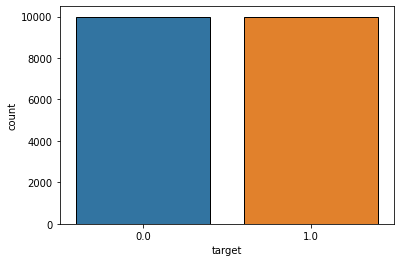

In [282]:
from imblearn.over_sampling import SMOTE
# smote=SMOTE(sampling_strategy='not majority')
# X_sm , y_sm = smote.fit_resample(X_train,y_train)
smote = SMOTE(random_state = 402)
X_sm, y_sm = smote.fit_resample(X_train,y_train)


sns.countplot(y_sm, edgecolor = 'black')

In [283]:
print(X_sm.shape)

(19990, 25)


In [284]:
y_sm.value_counts()

0.0    9995
1.0    9995
Name: target, dtype: int64

In [285]:
y_test.value_counts()

0.0    4302
1.0    1409
Name: target, dtype: int64

## Metric Evaluation Function

In [286]:
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def eval_classification(model, xtrain, ytrain, xtest, ytest):
    ypred = model.predict(xtest)
    print("Accuracy (Test Set): %.2f" % accuracy_score(ytest, ypred))
    print("Precision (Test Set): %.2f" % precision_score(ytest, ypred))
    print("Recall (Test Set): %.2f" % recall_score(ytest, ypred))
    print("F1-Score (Test Set): %.2f" % f1_score(ytest, ypred))
    
    y_pred_proba = model.predict_proba(xtest)
    print("AUC: %.2f" % roc_auc_score(ytest, y_pred_proba[:, 1]))
    
    confusion_matrix = metrics.confusion_matrix(ytest, ypred)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Tidak Pindah', 'Pindah'])
    cm_display.plot()
    plt.show()

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')
    

In [287]:
import numpy as np
from matplotlib import pyplot as plt

## Modelling

Modelling yang digunakan:
1. Decission Tree Classifier ( Nabila)
2. Logistic Regression (Rheza)
3. XGBoost - Boosting (Hafizh)
4. K Nearest Neighbors Classifier (Hafizh)
5. Support Vector Regressor (Junilia)
6. AdaBoost - Boosting (Junilia)
7. Random Forest Bagging (Etta)
8. Stacking Classifier (Etta)
9. Naive Bayes Gaussian  (Rheza)


### Decision Tree Classifier

Accuracy (Test Set): 0.70
Precision (Test Set): 0.41
Recall (Test Set): 0.50
F1-Score (Test Set): 0.45
AUC: 0.63


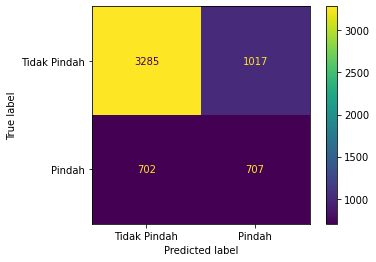

In [288]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_sm,y_sm)
eval_classification(dt, X_sm, y_sm, X_test, y_test)

In [289]:
print('Train score: ' + str(dt.score(X_sm, y_sm))) #accuracy
print('Test score: ' + str(dt.score(X_test, y_test))) #accuracy

Train score: 0.9968484242121061
Test score: 0.6990019261075118


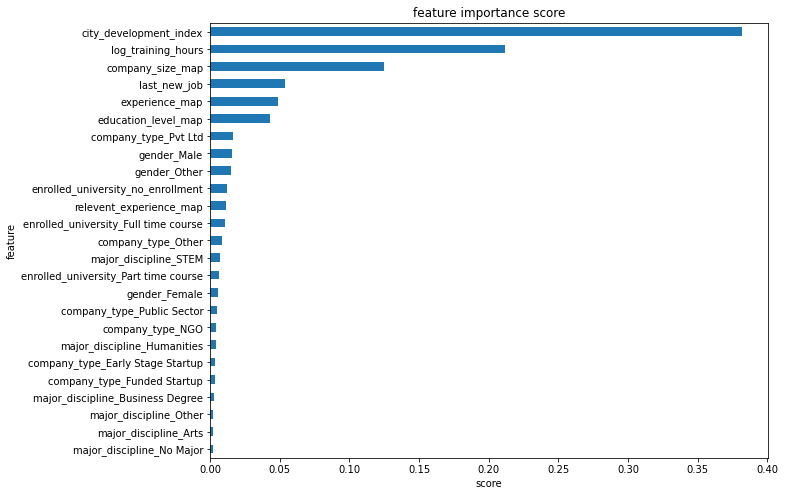

In [290]:
show_feature_importance(dt)

### Logistic Regression

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Accuracy (Test Set): 0.72
Precision (Test Set): 0.45
Recall (Test Set): 0.65
F1-Score (Test Set): 0.53
AUC: 0.75


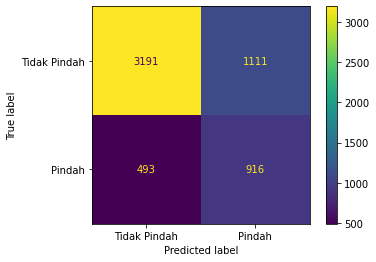

In [291]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=42)
logreg.fit(X_sm, y_sm)
eval_classification(logreg, X_sm, y_sm, X_test, y_test)

In [292]:
print('Train score: ' + str(logreg.score(X_sm, y_sm))) #accuracy
print('Test score: ' + str(logreg.score(X_test, y_test))) #accuracy

Train score: 0.7402201100550275
Test score: 0.719138504640168


In [293]:
#show_feature_importance(logreg) tidak bisa

###XGBOOST

Accuracy (Test Set): 0.75
Precision (Test Set): 0.49
Recall (Test Set): 0.76
F1-Score (Test Set): 0.60
AUC: 0.79


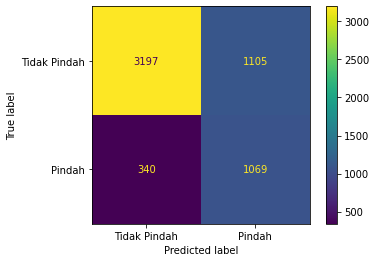

In [294]:
import xgboost
from xgboost import XGBClassifier
xg = XGBClassifier()
xg.fit(X_sm,y_sm)
eval_classification(xg, X_sm, y_sm, X_test, y_test)

In [295]:
print('Train score: ' + str(xg.score(X_sm, y_sm))) #accuracy
print('Test score: ' + str(xg.score(X_test, y_test))) #accuracy

Train score: 0.7855427713856928
Test score: 0.7469795132201016


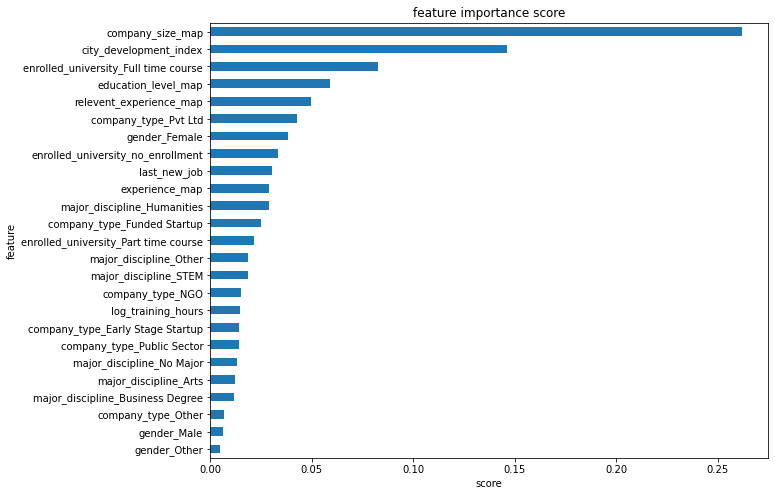

In [296]:
show_feature_importance(xg)

###KNearestNeighbor

Accuracy (Test Set): 0.65
Precision (Test Set): 0.36
Recall (Test Set): 0.56
F1-Score (Test Set): 0.44
AUC: 0.66


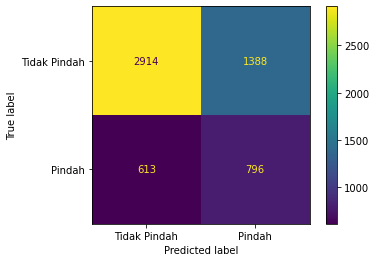

In [297]:
from sklearn.neighbors import KNeighborsClassifier # import knn dari sklearn
knn = KNeighborsClassifier() # inisiasi object dengan nama knn
knn.fit(X_sm, y_sm) # fit model KNN dari data train
eval_classification(knn, X_sm, y_sm, X_test, y_test)

In [298]:
print('Train score: ' + str(knn.score(X_sm, y_sm))) #accuracy
print('Test score: ' + str(knn.score(X_test, y_test))) #accuracy

Train score: 0.8434217108554277
Test score: 0.6496235335317808


In [299]:
#show_feature_importance(knn) tidak bisa

###Support Vector Regressor

In [300]:
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [301]:
svm = SVC()
svm.fit(X_sm, y_sm)
y_pred_svm = svm.predict(X_test)
cm_svm = confusion_matrix(y_pred_svm, y_test)
acc_svm = accuracy_score(y_test, y_pred_svm)

# from sklearn.svm import SVR

# svr = SVR()
# svr.fit(X_train, y_train)
# pred = svr.predict(X_test)
# eval_classification(svr, X_train, y_train, X_test, y_test)

In [302]:
eval_classification(svm, X_sm, y_sm, X_test, y_test)

Accuracy (Test Set): 0.73
Precision (Test Set): 0.47
Recall (Test Set): 0.77
F1-Score (Test Set): 0.58


AttributeError: ignored

In [ ]:
#show_feature_importance(svm) tidak bisa

In [ ]:
print('Train score: ' + str(svm.score(X_sm, y_sm))) #accuracy
print('Test score: ' + str(svm.score(X_test, y_test))) #accuracy

###AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets
from sklearn import metrics

In [ ]:
# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=50, learning_rate=1)
# Train Adaboost Classifer
abc.fit(X_sm, y_sm)

In [ ]:
eval_classification(abc, X_sm, y_sm, X_test, y_test)

In [ ]:
print('Train score: ' + str(abc.score(X_sm, y_sm))) #accuracy
print('Test score: ' + str(abc.score(X_test, y_test))) #accuracy

In [ ]:
show_feature_importance(abc)

###Naive Bayes with Gaussian

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_sm, y_sm)
eval_classification(gnb, X_sm, y_sm, X_test, y_test)

In [ ]:
#show_feature_importance(gnb) tidak bisa

In [ ]:
print('Train score: ' + str(gnb.score(X_sm, y_sm))) #accuracy
print('Test score: ' + str(gnb.score(X_test, y_test))) #accuracy

###Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_sm, y_sm)
eval_classification(rf, X_sm, y_sm, X_test, y_test)

In [ ]:
print('Train score: ' + str(rf.score(X_sm, y_sm))) #accuracy
print('Test score: ' + str(rf.score(X_test, y_test))) #accuracy

In [ ]:
show_feature_importance(rf)

### Stacking Classifier

In [ ]:
# define the base models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
level0 = list()
level0.append(('lr', LogisticRegression()))
level0.append(('knn', KNeighborsClassifier()))
level0.append(('cart', DecisionTreeClassifier()))
level0.append(('svm', SVC()))
level0.append(('forest',RandomForestClassifier()))



In [ ]:
#define meta model
from sklearn.ensemble import StackingClassifier
# define meta learner model
level1 = LogisticRegression()
# define the stacking ensemble
stack = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)

In [ ]:
stack.fit(X_sm,y_sm)

In [ ]:
eval_classification(stack, X_sm, y_sm, X_test, y_test)

In [ ]:
print('Train score: ' + str(stack.score(X_sm, y_sm))) #accuracy
print('Test score: ' + str(stack.score(X_test, y_test))) #accuracy

## Remodelling 2

Dipilih menggunakan XGBoost
####1. Percobaan 1

In [ ]:
X = df_now[['city_development_index','log_training_hours','company_size_map']]
y = pd.Series(df_now['target'])

In [ ]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy='not majority')
X_sm , y_sm = smote.fit_resample(X_train,y_train)


In [ ]:
import xgboost
from xgboost import XGBClassifier
xg = XGBClassifier()
xg.fit(X_sm,y_sm)
eval_classification(xg, X_sm, y_sm, X_test, y_test)

In [ ]:
print('Train score: ' + str(xg.score(X_sm, y_sm))) #accuracy
print('Test score: ' + str(xg.score(X_test, y_test))) #accuracy

####Percobaan 2

In [ ]:
X = df_now[['city_development_index','log_training_hours']]
y = pd.Series(df_now['target'])

In [ ]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy='not majority')
X_sm , y_sm = smote.fit_resample(X_train,y_train)

In [ ]:
import xgboost
from xgboost import XGBClassifier
xg = XGBClassifier()
xg.fit(X_sm,y_sm)
eval_classification(xg, X_sm, y_sm, X_test, y_test)

In [ ]:
print('Train score: ' + str(xg.score(X_sm, y_sm))) #accuracy
print('Test score: ' + str(xg.score(X_test, y_test))) #accura

####Percobaan 3

In [ ]:
X = df_now[['city_development_index','company_size_map']]
y = pd.Series(df_now['target'])

In [ ]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy='not majority')
X_sm , y_sm = smote.fit_resample(X_train,y_train)

In [ ]:
import xgboost
from xgboost import XGBClassifier
xg = XGBClassifier()
xg.fit(X_sm,y_sm)
eval_classification(xg, X_sm, y_sm, X_test, y_test)

In [ ]:
print('Train score: ' + str(xg.score(X_sm, y_sm))) #accuracy
print('Test score: ' + str(xg.score(X_test, y_test))) #accura

####Percobaan 4

In [ ]:
X = df_now[['city_development_index','company_size_map', 'enrolled_university_Full time course']]
y = pd.Series(df_now['target'])

In [ ]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy='not majority')
X_sm , y_sm = smote.fit_resample(X_train,y_train)

In [ ]:
import xgboost
from xgboost import XGBClassifier
xg = XGBClassifier()
xg.fit(X_sm,y_sm)
eval_classification(xg, X_sm, y_sm, X_test, y_test)

In [ ]:
print('Train score: ' + str(xg.score(X_sm, y_sm))) #accuracy
print('Test score: ' + str(xg.score(X_test, y_test))) #accura

####Percobaan 5

In [ ]:
X = df_now[['city_development_index','company_size_map', 'enrolled_university_Full time course','education_level_map']]
y = pd.Series(df_now['target'])

In [ ]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy='not majority')
X_sm , y_sm = smote.fit_resample(X_train,y_train)

In [ ]:
import xgboost
from xgboost import XGBClassifier
xg = XGBClassifier()
xg.fit(X_sm,y_sm)
eval_classification(xg, X_sm, y_sm, X_test, y_test)

In [ ]:
print('Train score: ' + str(xg.score(X_sm, y_sm))) #accuracy
print('Test score: ' + str(xg.score(X_test, y_test))) #accura

####Percobaan 6*

In [ ]:
X = df_now[['city_development_index','company_size_map', 'enrolled_university_Full time course','education_level_map','relevent_experience_map']]
y = pd.Series(df_now['target'])

In [ ]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy='not majority')
X_sm , y_sm = smote.fit_resample(X_train,y_train)

In [ ]:
import xgboost
from xgboost import XGBClassifier
xg = XGBClassifier()
xg.fit(X_sm,y_sm)
eval_classification(xg, X_sm, y_sm, X_test, y_test)

In [ ]:
print('Train score: ' + str(xg.score(X_sm, y_sm))) #accuracy
print('Test score: ' + str(xg.score(X_test, y_test))) #accura

#### Percobaan 7

In [ ]:
# X = df_now[['city_development_index','company_size_map', 'enrolled_university_Full time course','education_level_map','relevent_experience_map','company_type_Pvt Ltd']]
# y = pd.Series(df_now['target'])

In [ ]:
# from sklearn.model_selection import train_test_split 
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# from imblearn.over_sampling import SMOTE
# smote=SMOTE(sampling_strategy='not majority')
# X_sm , y_sm = smote.fit_resample(X_train,y_train)

In [ ]:
# import xgboost
# from xgboost import XGBClassifier
# xg = XGBClassifier()
# xg.fit(X_sm,y_sm)
# eval_classification(xg, X_sm, y_sm, X_test, y_test)

In [ ]:
# print('Train score: ' + str(xg.score(X_sm, y_sm))) #accuracy
# print('Test score: ' + str(xg.score(X_test, y_test))) #accura

####Hypertuning 

Accuracy (Test Set): 0.77
Precision (Test Set): 0.52
Recall (Test Set): 0.68
F1-Score (Test Set): 0.59
AUC: 0.78


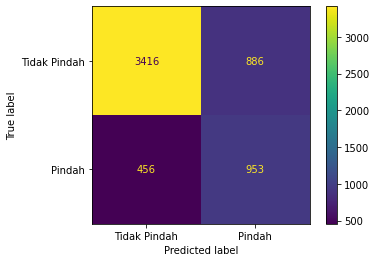

In [303]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np

#Menjadikan ke dalam bentuk dictionary
hyperparameters = {
                    'max_depth' : [int(x) for x in np.linspace(10, 110, num = 11)],
                    'min_child_weight' : [int(x) for x in np.linspace(1, 20, num = 11)],
                    'gamma' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'tree_method' : ['auto', 'exact', 'approx', 'hist'],

                    'colsample_bytree' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'eta' : [float(x) for x in np.linspace(0, 1, num = 100)],

                    'lambda' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'alpha' : [float(x) for x in np.linspace(0, 1, num = 11)]
                    }

# Init
xg = XGBClassifier(random_state=42)
xg_tuned = RandomizedSearchCV(xg, hyperparameters, cv=5, random_state=42, scoring='recall')
xg_tuned.fit(X_sm,y_sm)
# Predict & Evaluation
eval_classification(xg_tuned, X_sm, y_sm, X_test, y_test)

In [ ]:
print('Train score: ' + str(xg_tuned.score(X_sm, y_sm))) #accuracy
print('Test score: ' + str(xg_tuned.score(X_test, y_test))) #accuracy

Dengan menggunakan model XGBoost, dengan 5 fitur city_development_index','company_size_map', 'enrolled_university_Full time course','education_level_map','relevent_experience_map', menghasilkan nilai Precision sebanyak 0,51,